In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import pickle
import numpy as np
import os

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float')
        for i in range(cm.shape[0]):
            if cm[i].sum() > 0:
                cm[i] /= cm[i].sum()
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

201704151502
201704151103
201704151140
201704151347
201704151315
201704151035
201704150933
Normalized confusion matrix


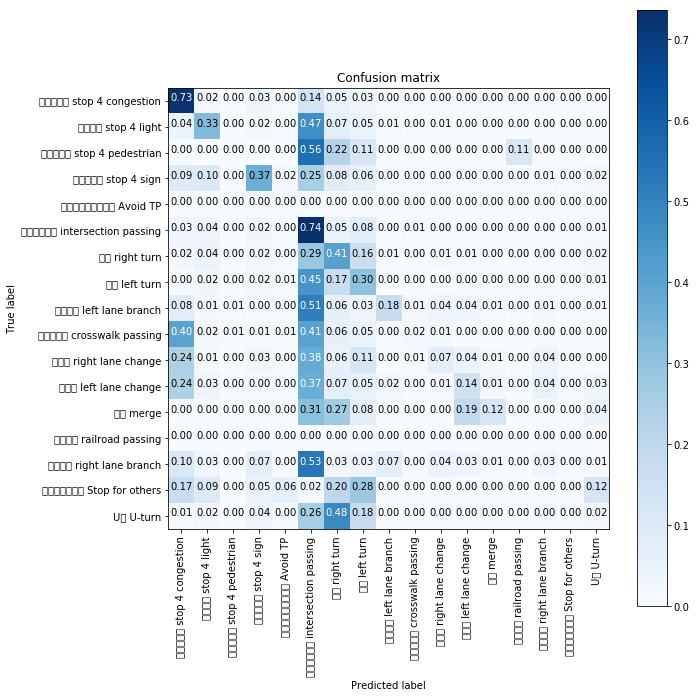

mean Accuracy:  0.229992850737


In [18]:
# Overall performance

annotation_root = '../annotation/'
result_root = '../result/logistic_camera_feat_fc_PCA500'

result_name = 'result.pkl'
result = pickle.load(open(os.path.join(result_root, result_name), 'r'))

confusion = np.zeros((17,17))
for session_id in result.keys():
    if not '20170415' in session_id:
        continue
    print session_id

    r = result[session_id]
    gt = pickle.load(open(os.path.join(annotation_root, session_id+'/annotations.pkl'), 'r'))
    gt = np.max(gt, axis=1)

    # no background classes
    index = gt>0
    gt = gt[index]
    r = r[index]
    #print result.min(), result.max()
    
    confusion += confusion_matrix(gt, r, range(1,18))
    

label_dict= pickle.load(open(os.path.join(annotation_root, 'num2label.pkl'), 'r'))
class_names = []
for i in range(1,len(label_dict.keys())):
    class_names.append(label_dict[i])

plt.figure(figsize=(10, 10))
plot_confusion_matrix(confusion, classes=class_names, normalize=True)

plt.show()

confusion = confusion.astype(float)
mAcc = 0; count = 0
for i in range(confusion.shape[0]):
    if confusion[i].sum() > 0:
        confusion[i] /= confusion[i].sum()
        mAcc += confusion[i, i]
        count += 1
mAcc /= count
print 'mean Accuracy: ', mAcc

2 17
Normalized confusion matrix
Acc:  0.230125523013


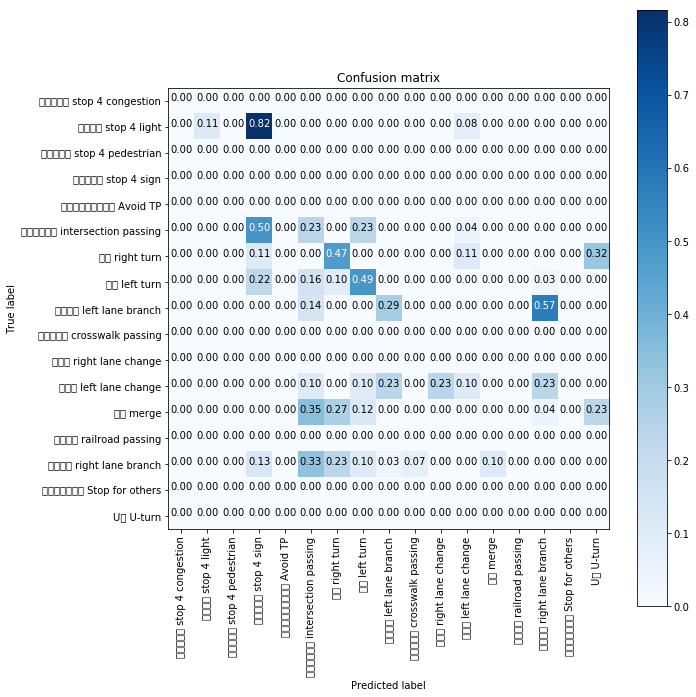

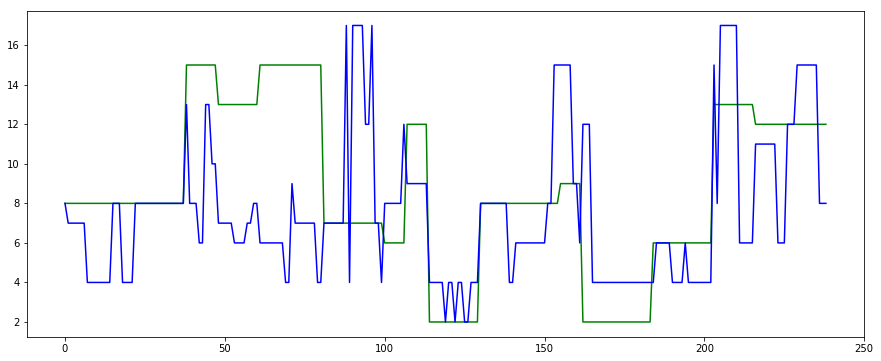

In [9]:
# visualize one session
annotation_root = '../annotation/'
result_root = '../result/lg_pred_cross1'

session_id = '201704150933'
#session_id = '201704141145'

result_name = 'result.pkl'
result = pickle.load(open(os.path.join(result_root, result_name), 'r'))
result = result[session_id]
gt = pickle.load(open(os.path.join(annotation_root, session_id+'/annotations.pkl'), 'r'))
gt = np.max(gt, axis=1)

# no background classes
index = gt>0
gt = gt[index]
result = result[index]
print result.min(), result.max()

label_dict= pickle.load(open(os.path.join(annotation_root, 'num2label.pkl'), 'r'))
class_names = []
for i in range(1,len(label_dict.keys())):
    class_names.append(label_dict[i])

confusion = confusion_matrix(gt, result, range(1,18))
plt.figure(figsize=(10, 10))
plot_confusion_matrix(confusion, classes=class_names, normalize=True)

acc = accuracy_score(gt, result)
print "Acc: ", acc

tmin = 0
tmax = 10000

plt.figure("Prediction result", figsize=(15, 6))
plt.plot(gt[tmin:tmax], 'g')
plt.plot(result[tmin:tmax], 'b')
plt.show()